# CONSTRAINED OPTIMIZATION & THE KKT CONDITIONS

## Regression $l_1$ and $l_\infty$

Some code is given below to generate a synthetic dataset.  Using CVX, solve two linear programs for computing the regression line for $l_1$ and $l_\infty$ regression.  Plot the lines over the data to evaluate the fit.

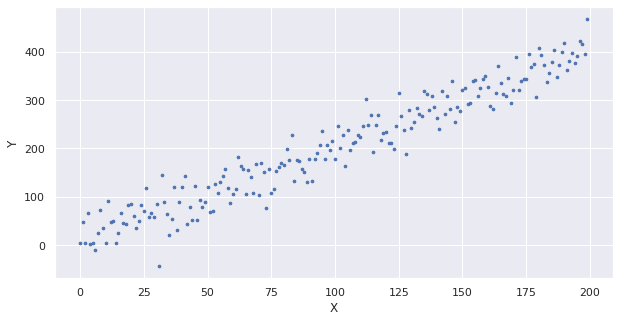

In [2]:
# l_1 and l_∞ regression using cvxpy
import numpy as np
import cvxpy as cvx
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

# Generate a synthetic dataset

# Actual parameter values
theta1_act = 2
theta2_act = 5

# Number of points in dataset
N = 200

# Noise magnitude
mag = 30

# Datapoints
x = np.arange(0, N)
y = theta1_act * x + theta2_act *np.ones([1, N]) + np.random.normal(0, mag, N)

# Scatter plot of data
plt.figure(figsize=(10, 5))
plt.scatter(x, y, s=7); plt.xlabel('X'); plt.ylabel('Y')
plt.show()

In [0]:
def plot_fit(x, y, theta, norm):
    plt.figure(figsize=(10, 5))
    slope, intercept = theta.value[0][0], theta.value[1][0]
    line = lambda k: k * slope + intercept
    plt.title('Least-error line with {}-norm'.format(norm), fontsize=20)
    plt.scatter(x, y, s=7); plt.xlabel('X'); plt.ylabel('Y')
    plt.plot(x, line(x), color='red', linewidth=.5)

## $L_{1}$ norm

In [4]:
theta_1 = cvx.Variable(shape=(2, 1))

Y = y.T
X = np.column_stack((x, np.ones(N)))
S = cvx.Variable(shape=(N, 1))

objective_1 = cvx.Minimize(cvx.atoms.norm1(S))
constraints = [Y - X @ theta_1 >= -S, Y - X @ theta_1 <= S]
problem_1 = cvx.Problem(objective_1, constraints)
optimal_1 = problem_1.solve(verbose=False) # True
print('Optimal value: ', round(optimal_1, 5), 
      '\nLine slope:', round(theta_1.value[0][0], 5),
      '\nIntercept:', round(theta_1.value[1][0], 5)) 

Optimal value:  4820.12001 
Line slope: 1.95101 
Intercept: 9.13685


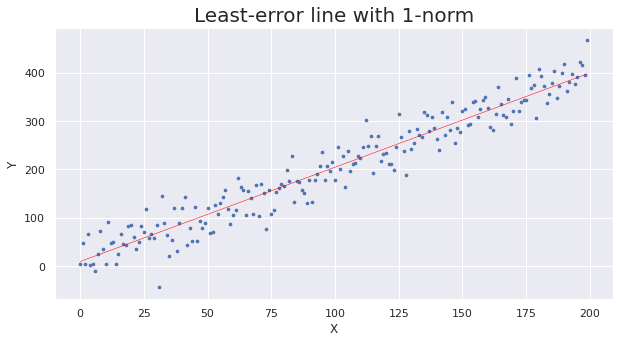

In [5]:
plot_fit(x, y, theta_1, 1)

## $L_\infty$ norm

In [6]:
theta_inf = cvx.Variable(shape=(2, 1))

Y = y.T
X = np.column_stack((x, np.ones(N)))

objective_inf = cvx.Minimize(cvx.atoms.norm_inf(Y - X * theta_inf))
problem_inf = cvx.Problem(objective_inf)
optimal_inf = problem_inf.solve()
print('Optimal value: ', round(optimal_inf, 5), 
      '\nLine slope:', round(theta_inf.value[0][0], 5),
      '\nIntercept:', round(theta_inf.value[1][0], 5))

Optimal value:  93.28316 
Line slope: 2.36313 
Intercept: -23.34792


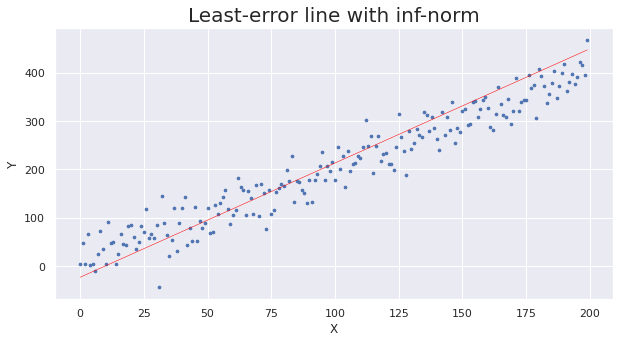

In [7]:
plot_fit(x, y, theta_inf, np.inf)

### Extension part

In [0]:
# what if we capture the optimal value as we change the norm [Minkowski distance]
def norm_regression(N, x_values, y_values, norm):
    theta = cvx.Variable(shape=(2, 1))
    Y = y_values.T
    X = np.column_stack((x_values, np.ones(N)))
    S = cvx.Variable(shape=(N, 1))

    if norm==1: objective = cvx.Minimize(cvx.atoms.norm1(S))
    else: objective = cvx.Minimize(cvx.atoms.Pnorm(S, p=norm))
    constraints = [Y - X @ theta >= -S, Y - X @ theta <= S]
    problem = cvx.Problem(objective, constraints)

    return problem.solve(), theta.value[0][0], theta.value[1][0]

In [0]:
norm_optimality = []
for _ in range(1, 21):
    norm_optimality.append(norm_regression(200, x, y, _))

In [10]:
import pandas as pd
norm_optimality = pd.DataFrame(norm_optimality, columns=['Optimal value', 'Slope', 'Intercept'])
norm_optimality.index += 1
norm_optimality.head(10)

Optimal value     Slope  Intercept
1     4820.120007  1.951006   9.136853
2      430.561084  1.968524   7.527359
3      209.677544  1.980097   5.906714
4      153.390761  1.999338   3.172261
5      130.849820  2.024193  -0.241882
6      119.606653  2.049113  -3.609517
7      113.124618  2.070217  -6.442469
8      108.984011  2.086679  -8.648076
9      106.142374  2.099135 -10.321503
10     104.090373  2.108482 -11.588568

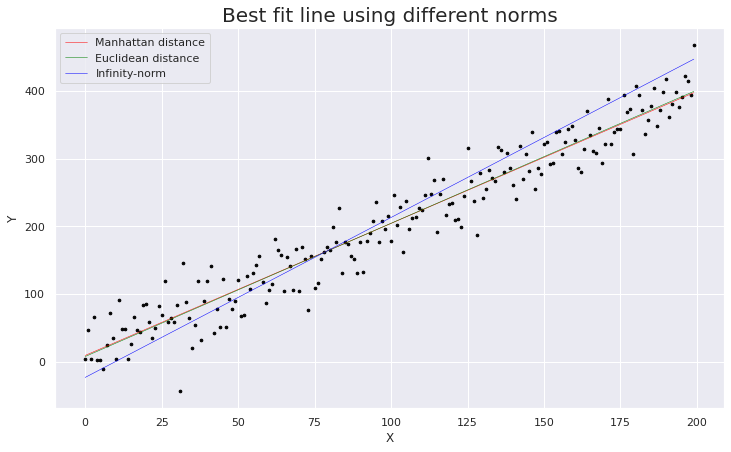

In [13]:
# Plotting the 1-norm, 2-norm, and infinity-norm 
plt.figure(figsize=(12, 7))
plt.scatter(x, y, s=7, color='black')

line_1 = lambda k: k * norm_optimality['Slope'][1] + norm_optimality['Intercept'][1]
line_2 = lambda k: k * norm_optimality['Slope'][2] + norm_optimality['Intercept'][2]
line_inf = lambda k: k * theta_inf.value[0][0] + theta_inf.value[1][0]

plt.plot(x, line_1(x), color='red', linewidth=.5, label='Manhattan distance')
plt.plot(x, line_2(x), color='green', linewidth=.5, label='Euclidean distance')
plt.plot(x, line_inf(x), color='blue', linewidth=.5, label='Infinity-norm')
plt.legend(); plt.xlabel('X'); plt.ylabel('Y')
plt.title('Best fit line using different norms', fontsize=20)
plt.show()

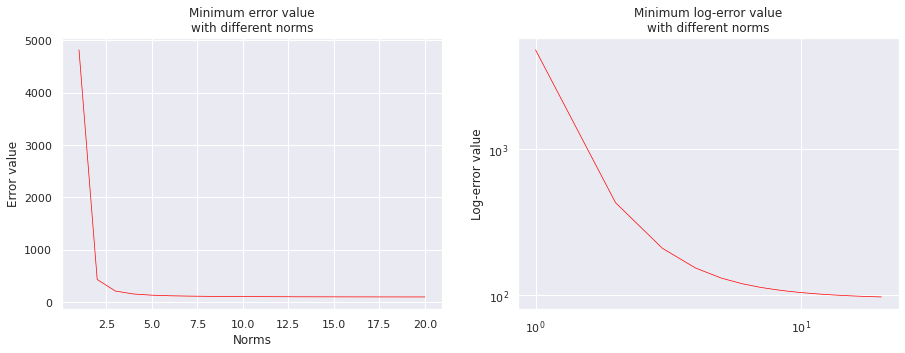

In [12]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.title('Minimum error value\nwith different norms')
plt.xlabel('Norms'); plt.ylabel('Error value')
plt.plot(list(range(1, 21)), norm_optimality['Optimal value'], 
         linewidth=.7, color='red')
plt.subplot(1,2,2)
plt.title('Minimum log-error value\nwith different norms')
plt.ylabel('Log-error value')
plt.loglog(list(range(1, 21)), norm_optimality['Optimal value'], 
             linewidth=.7, color='red')
plt.show()

## References
- Boyd, S., & Vandenberghe, L. (2015). Convex optimization. Cambridge: Cambridge University Press. Retrieved from: https://course-resources.minerva.kgi.edu/uploaded_files/mke/YDzxkr/boyd2004-cvx.pdf
- Calafiore, G., & Ghaoui, L. E. (2014).Optimzation models. Cambridge: Cambridge. Retrieved from: https://vel.life/%E5%87%B8%E4%BC%98%E5%8C%96/Optimization.Models.pdf